<div style="text-align: center; font-size: 36px; font-weight: bold;">
    Hotel Bookings Data Analysis
</div>

In [2]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

# Lets Read the data

In [3]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


# Exploratory Data Analysis

In [4]:
# Checking dimensions of the dataframe.
df.shape

(119390, 32)

In [6]:
# Checking data-type of the features.
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [8]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [9]:
## Adults,babies & children cant be zero at a same time bcz booking couldn't be possible if these 3 attributes are 0.
filter1 = (df['children']==0) & (df['adults']==0) & (df['babies']==0)

In [12]:
df = df[~filter1]

In [14]:
# Check for any duplicate rows.
df.duplicated().sum()

31980

In [15]:
# Drop duplicate rows.
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(87230, 32)

# Perform Descriptive Analysis


In [23]:
df[['lead_time','adr','total_of_special_requests']].describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,87230.0,79.971019,86.058683,0.00,11.00,49.0,125.0,737.0
adr,87230.0,106.518031,54.891227,-6.38,72.25,98.2,134.1,5400.0
total_of_special_requests,87230.0,0.698934,0.832051,0.00,0.00,0.0,1.0,5.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87230 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87230 non-null  object 
 1   is_canceled                     87230 non-null  int64  
 2   lead_time                       87230 non-null  int64  
 3   arrival_date_year               87230 non-null  int64  
 4   arrival_date_month              87230 non-null  object 
 5   arrival_date_week_number        87230 non-null  int64  
 6   arrival_date_day_of_month       87230 non-null  int64  
 7   stays_in_weekend_nights         87230 non-null  int64  
 8   stays_in_week_nights            87230 non-null  int64  
 9   adults                          87230 non-null  int64  
 10  children                        87226 non-null  float64
 11  babies                          87230 non-null  int64  
 12  meal                            8723

In [27]:
for col in ['lead_time','adr','total_of_special_requests']:
    print(f'Feature name: {col}')
    for i in range(90,101):
        quantile = np.quantile(df[col],q=i/100) 
        print(f'{i}th quantile is =',quantile)
    print()

Feature name: lead_time
90th quantile is = 204.0
91th quantile is = 212.0
92th quantile is = 220.0
93th quantile is = 230.0
94th quantile is = 241.0
95th quantile is = 256.0
96th quantile is = 272.0
97th quantile is = 291.0
98th quantile is = 315.0
99th quantile is = 347.0
100th quantile is = 737.0

Feature name: adr
90th quantile is = 174.0
91th quantile is = 179.0
92th quantile is = 185.0
93th quantile is = 190.0
94th quantile is = 197.1
95th quantile is = 204.13300000000018
96th quantile is = 213.0
97th quantile is = 225.0
98th quantile is = 239.0
99th quantile is = 261.6207000000011
100th quantile is = 5400.0

Feature name: total_of_special_requests
90th quantile is = 2.0
91th quantile is = 2.0
92th quantile is = 2.0
93th quantile is = 2.0
94th quantile is = 2.0
95th quantile is = 2.0
96th quantile is = 2.0
97th quantile is = 3.0
98th quantile is = 3.0
99th quantile is = 3.0
100th quantile is = 5.0



"adr" feature seems to have Outlier as 99th percentile value 
is 261 but 100th percentile(max value) is 5400. 

# Perform Spatial Analysis on Guest Home-Town
# Where do guests come from ?

In [28]:
not_cancelled_df = df[df['is_canceled']==0]
not_cancelled_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [29]:
country_wise_df = not_cancelled_df['country'].value_counts().reset_index() 

In [30]:
country_wise_df.columns = ['country','No. of guests']

In [32]:
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)

In [33]:
# Show on Map
map_guest = px.choropleth(data_frame=country_wise_df,locations=country_wise_df['country'],color=country_wise_df['No. of guests'],
              hover_name=country_wise_df['country'],title='Home country of Guests')


In [34]:
map_guest

Most guests are from Portugal and other countries in Europe

# Analysis Difference between assigned and the reserved room type.


In [38]:
pd.crosstab(df['reserved_room_type'],df['assigned_room_type'],margins=True)

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L,All
reserved_room_type,,,,,,,,,,,,
A,45850,892,1253,6402,1034,390,176,94,205,140,0,56436
B,106,872,0,5,2,2,8,0,0,1,0,996
C,5,2,866,6,4,2,10,9,10,0,0,914
D,295,27,32,15979,657,199,82,9,67,29,0,17376
E,15,2,6,22,5458,383,97,4,40,9,0,6036
F,6,14,0,4,31,2636,113,3,10,3,0,2820
G,5,1,2,0,4,14,1999,7,15,3,0,2050
H,0,0,0,1,0,0,10,579,6,0,0,596
L,1,1,1,0,0,1,0,1,0,0,1,6


## Lets find meaningful insight from this :

for A category room , 56436 folks have reserved "A" & 45850 folks get assigned_room as "A".. & rest are unable to get !

for B category room , 996 folks have reserved "B" &  872 folks get assigned_room as "B".. & rest are unable to get !




In [42]:
# Lets normalize above table to get more meaningful insights!
pivot_normalize = pd.crosstab(df['reserved_room_type'],df['assigned_room_type'],margins=True,normalize='index').round(2)*100
pivot_normalize

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L
reserved_room_type,,,,,,,,,,,
A,81.0,2.0,2.0,11.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
B,11.0,88.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C,1.0,0.0,95.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
D,2.0,0.0,0.0,92.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0
E,0.0,0.0,0.0,0.0,90.0,6.0,2.0,0.0,1.0,0.0,0.0
F,0.0,0.0,0.0,0.0,1.0,93.0,4.0,0.0,0.0,0.0,0.0
G,0.0,0.0,0.0,0.0,0.0,1.0,98.0,0.0,1.0,0.0,0.0
H,0.0,0.0,0.0,0.0,0.0,0.0,2.0,97.0,1.0,0.0,0.0
L,17.0,17.0,17.0,0.0,0.0,17.0,0.0,17.0,0.0,0.0,17.0


Q. Is any difference between assigned and reserved room type ?

Ans : Yes 

# Which market segment has highest bookings?


In [44]:
df['market_segment'].value_counts()

market_segment
Online TA        51553
Offline TA/TO    13855
Direct           11780
Groups            4922
Corporate         4200
Complementary      692
Aviation           226
Undefined            2
Name: count, dtype: int64

In [45]:
fig = px.pie(df,values=df['market_segment'].value_counts().values,names=df['market_segment'].value_counts().index)
fig.show()

Most of the bookings have been done in Online mode.

# Analysing Avg. price per night (ADR) of various rooms.

<Axes: xlabel='market_segment', ylabel='adr'>

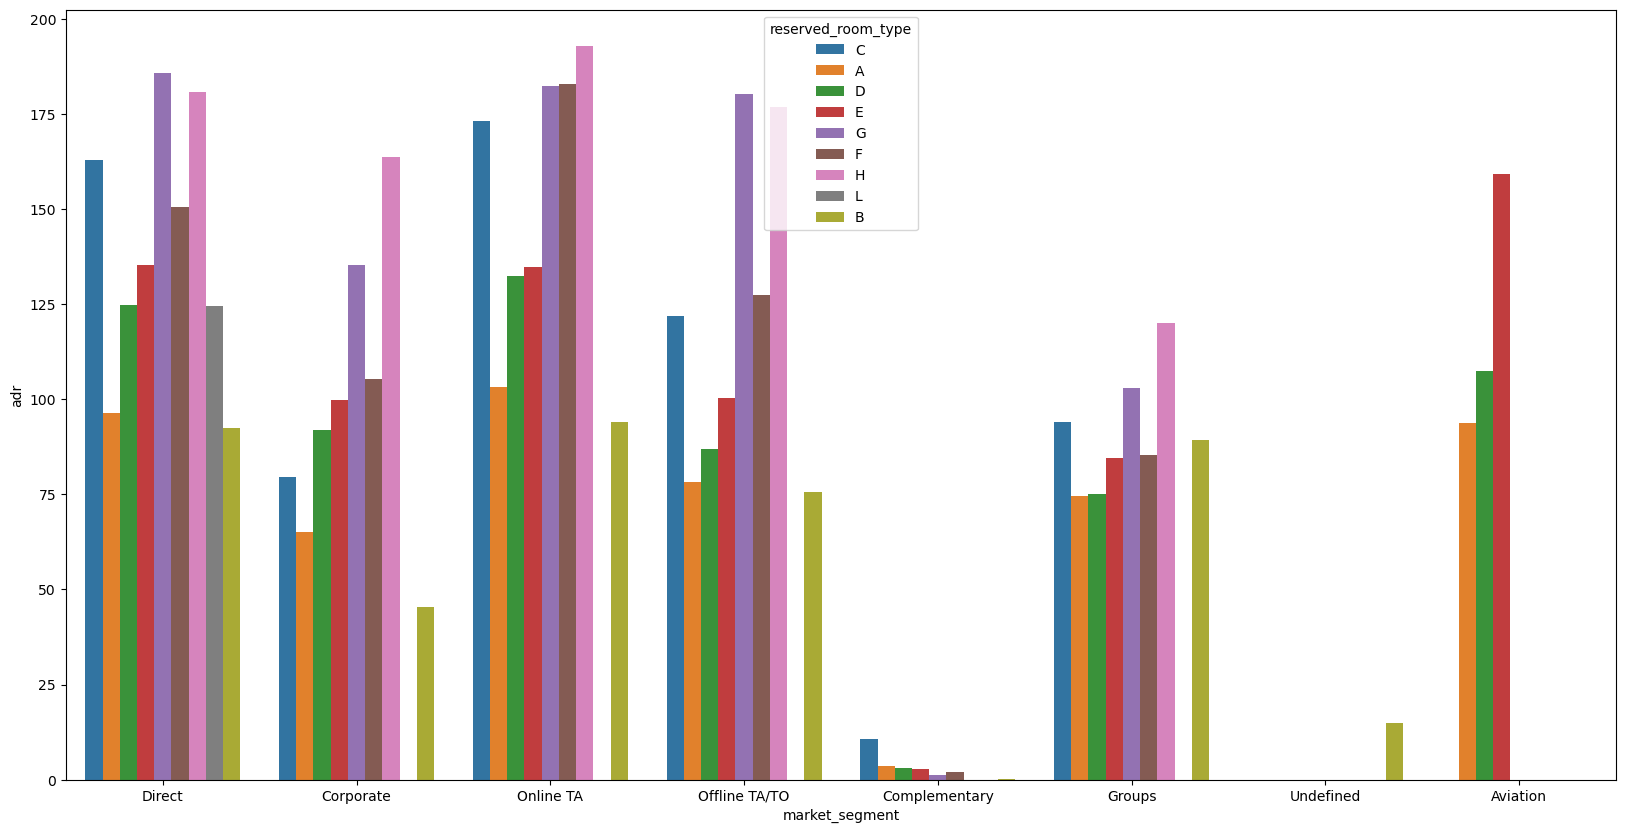

In [51]:
plt.figure(figsize=(20,10))
sns.barplot(data=df, x='market_segment',y='adr',ci=None,hue='reserved_room_type')

# Analysing total guest arrival on each day.

In [55]:
df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [56]:
dict_month = {'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12,
       'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6}

In [57]:
df['arrival_date_month_index'] = df['arrival_date_month'].map(dict_month)

In [60]:
df[['arrival_date_year','arrival_date_month_index','arrival_date_day_of_month']]

,arrival_date_year,arrival_date_month_index,arrival_date_day_of_month
0,2015,7,1
1,2015,7,1
2,2015,7,1
3,2015,7,1
4,2015,7,1
...,...,...,...
119385,2017,8,30
119386,2017,8,31
119387,2017,8,31
119388,2017,8,31


In [63]:
df['Arrival_date'] = df['arrival_date_year'].astype(str)+'-'+df['arrival_date_month_index'].astype(str)+'-'+df['arrival_date_day_of_month'].astype(str)

In [64]:
df['Total_guests'] = df['adults']+df['children']+df['babies']

In [67]:
df_not_cancel = df[df['is_canceled']==0]

In [69]:
guest_arrival_series = df_not_cancel.groupby(['Arrival_date'])['Total_guests'].sum()
guest_arrival_series

Arrival_date
2015-10-1     149.0
2015-10-10    167.0
2015-10-11    123.0
2015-10-12    186.0
2015-10-13    115.0
              ...  
2017-8-5      205.0
2017-8-6      199.0
2017-8-7      287.0
2017-8-8      191.0
2017-8-9      185.0
Name: Total_guests, Length: 793, dtype: float64

<Axes: xlabel='Arrival_date'>

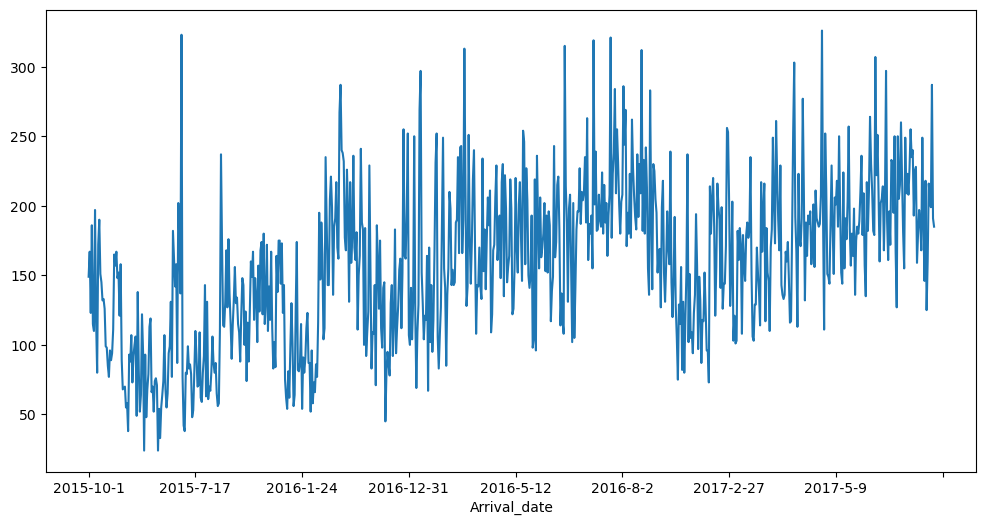

In [72]:
guest_arrival_series.plot(figsize=(12,6))

Q. Is there any pattern?

Ans. No , there is no visible pattern in guests arrival. In this line-plot as we have some un-even trend.

# Analysing Distribution of guest arrival.

<Axes: ylabel='Density'>

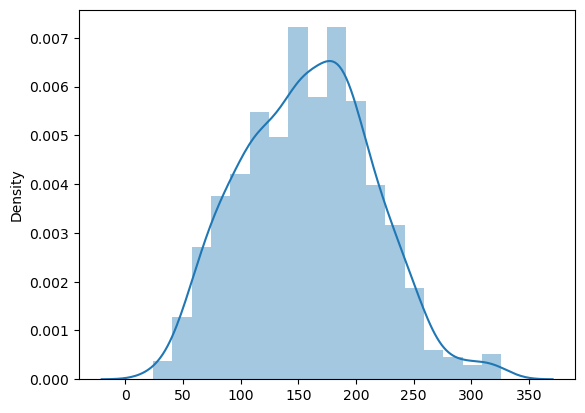

In [82]:
sns.distplot(guest_arrival_series.values)

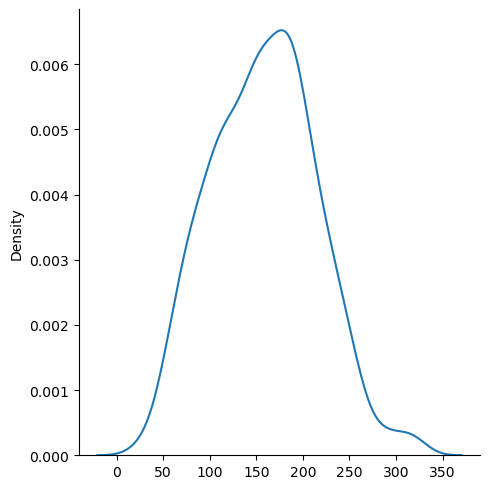

In [80]:
sns.displot(guest_arrival_series.values,kind='kde')